In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# df = pd.read_csv("./data/Intercept-all-data.csv")
df = pd.read_csv("./data/Intercept_2021.csv")

In [4]:
# Convert Date Intercept to datetime, day first
df["Date Intercepted"] = pd.to_datetime(df["Date Intercepted"], dayfirst=True)

In [5]:
# add month column
df['Month'] = df['Date Intercepted'].dt.month

In [6]:
monthly_weights = df.groupby('Month').sum()['Weight (in grams)']

In [7]:
print(monthly_weights)

Month
2       7184800
3     124405190
4     102233283
5      72768409
6      54545706
7      39183544
8      43383779
9     108630684
10     29029964
Name: Weight (in grams), dtype: int64


In [19]:
month_str = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]
for i in range(2, 11):
    print(f'{month_str[i-1]}: {monthly_weights[i]:,} Kg equivalent of {int(monthly_weights[i] / .42):,} meals')

annual_weight = sum(monthly_weights)
annual_meals = int(annual_weight / .42)
print(f'Annual: {annual_weight:,} Kg equivalent of {annual_meals:,} meals')

Feb: 7,184,800 Kg equivalent of 17,106,666 meals
Mar: 124,405,190 Kg equivalent of 296,202,833 meals
Apr: 102,233,283 Kg equivalent of 243,412,578 meals
May: 72,768,409 Kg equivalent of 173,258,116 meals
Jun: 54,545,706 Kg equivalent of 129,870,728 meals
Jul: 39,183,544 Kg equivalent of 93,294,152 meals
Aug: 43,383,779 Kg equivalent of 103,294,711 meals
Sep: 108,630,684 Kg equivalent of 258,644,485 meals
Oct: 29,029,964 Kg equivalent of 69,118,961 meals
Annual: 581,365,359 Kg equivalent of 1,384,203,235 meals


In [9]:
df['Kg'] = df['Weight (in grams)'] / 1000

In [10]:
month_sum = df.groupby('Month').sum()['Kg']

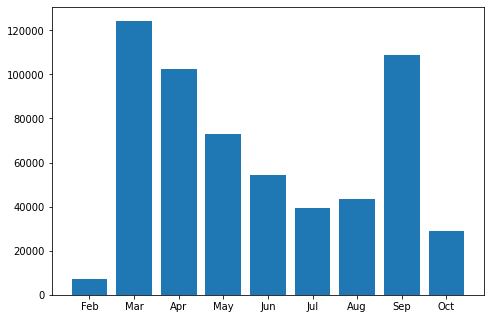

In [11]:
months = ["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month_sum.index.tolist(), month_sum)
plt.xticks(month_sum.index.tolist(), months)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Kg'>

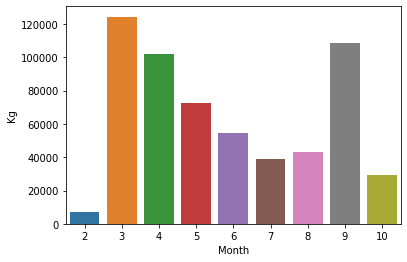

In [12]:
sns.barplot(data = df
            ,x = 'Month'
            ,y = 'Kg'
            ,ci = None
            ,estimator = sum
            )

<AxesSubplot:xlabel='Temperature', ylabel='Kg'>

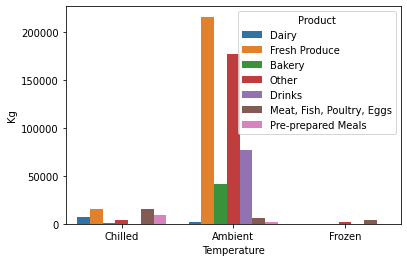

In [13]:
sns.barplot(data = df
            ,x = 'Temperature'
            ,y = 'Kg'
            ,ci = None
            ,estimator = sum
            ,hue='Product'
            )